# Feature Engineering

## What is Feature Engineering?

### Feature engineering is the pre-processing step of machine learning, which extracts features from raw data. It helps to represent an underlying problem to predictive models in a better way, which as a result, improve the accuracy of the model for unseen data. The predictive model contains predictor variables and an outcome variable, and while the feature engineering process selects the most useful predictor variables for the model.

### columns (variable or attributes), and these attributes are often known as features.

### Feature engineering in ML contains mainly four processes: Feature Creation, Transformations, Feature Extraction, and Feature Selection.




Feature Creation:
- Finding the most useful variables for a predictive model.
- Requires human creativity and intervention.
- New features are created by combining existing features using addition, subtraction, and ratios.
- Provides flexibility and enhances the model's performance.

Transformations:
- Adjusting predictor variables to improve model accuracy and performance.
- Ensuring model flexibility to handle a variety of data inputs.
- Scaling variables to the same range for better model interpretation.
- Improving model accuracy and avoiding computational errors.

Feature Extraction:
- Automated process of generating new variables from raw data.
- Aimed at reducing data volume for easier management and modeling.
- Methods include cluster analysis, text analytics, edge detection algorithms, and PCA.
- Helps uncover underlying patterns and structures in the data.

Feature Selection:
- Selecting the most relevant features for model development.
- Removing redundant, irrelevant, or noisy features.
- Enhances model performance and accuracy.
- Avoids negative impacts of including unnecessary features.



### Feature Engineering Techniques

## 1. Imputation: 
Imputation is a technique used in feature engineering to fill in missing values in a dataset. It is essential because many machine learning algorithms cannot handle missing data, so imputation helps to ensure that the dataset is complete before training a model.

Missing value mostly handle using mean,median or mode values.

* Mode value used where dataset having categorical column like:"Gender" which containts two values "Male" & "Female".

The choice between using mean or median for data imputation depends on the nature of the data and the presence of outliers. Here's a guideline on when to use mean and median:

Mean Imputation:
Use mean imputation when the data is normally distributed or does not have significant outliers.
Suitable for continuous or interval data.
Preserves the overall mean of the feature, maintaining the central tendency of the data.
Can be sensitive to extreme values, as outliers can significantly affect the mean.

Median Imputation:
Use median imputation when the data is skewed or contains outliers.
Suitable for ordinal or skewed data.
Resistant to outliers as it selects the middle value, making it more robust.
Preserves the median, which represents the central value of the data.




#### The missing values are identified using isnull().sum(), which calculates the number of missing values for each feature. Then, fillna(data.mean())

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Create the dataset
data = {
    'Name': ['John', 'Alice', 'Bob', 'Emily', 'Mike'],
    'Age': [20, 25, np.nan, 22, np.nan],
    'Score': [80, np.nan, 90, np.nan, 70]
}

df = pd.DataFrame(data)




In [31]:
df.isnull().sum()

Name     0
Age      2
Score    2
dtype: int64

In [10]:


# Drop rows with missing 'Age' values
df_dropped = df.dropna(subset=['Age'])



In [11]:
df_dropped

,Name,Age,Score
0,John,20.0,80.0
1,Alice,25.0,NaN
3,Emily,22.0,NaN


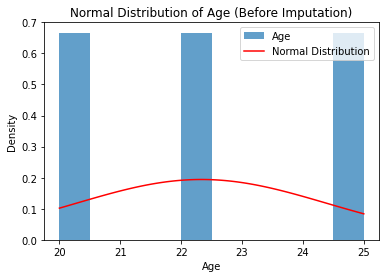

In [12]:
# Plot histogram of original 'Age' values
plt.hist(df_dropped['Age'], bins=10, density=True, alpha=0.7, label='Age')

# Fit a normal distribution curve to the original 'Age' values
mu, std = norm.fit(df_dropped['Age'])
x = np.linspace(df_dropped['Age'].min(), df_dropped['Age'].max(), 100)
y = norm.pdf(x, mu, std)
plt.plot(x, y, 'r', label='Normal Distribution')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Normal Distribution of Age (Before Imputation)')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [6]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=np.number).columns

# Perform mean imputation on numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Display the dataset after imputation
print(df)

    Name        Age  Score
0   John  20.000000   80.0
1  Alice  25.000000   80.0
2    Bob  22.333333   90.0
3  Emily  22.000000   80.0
4   Mike  22.333333   70.0


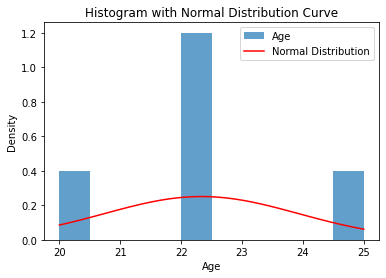

In [25]:
# Create a new figure for the plot
plt.figure()

# Plot histogram after imputation
plt.hist(df['Age'], bins=10, density=True, alpha=0.7, label='Age')

# Fit a normal distribution curve to the data
mu, std = norm.fit(df['Age'])
x = np.linspace(df['Age'].min(), df['Age'].max(), 100)
y = norm.pdf(x, mu, std)
plt.plot(x, y, 'r', label='Normal Distribution')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Histogram with Normal Distribution Curve')

# Show legend
plt.legend()

# Display the plot
plt.show()

## 2. Handling outliers:
is an important step in data preprocessing to ensure the accuracy and robustness of statistical analysis or machine learning models. Two common approaches for handling outliers are using the standard deviation method and the z-score method. Here's a short explanation of each method along with code references to perform outlier handling using these techniques on a DataFrame:



###  Normal Distribution

In [54]:
import pandas as pd
import numpy as np
df=pd.read_csv('placement.csv')

In [55]:
df.head(10)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
5,7.30,23.0,1
6,6.69,11.0,0
7,7.12,39.0,1
8,6.45,38.0,0
9,7.75,94.0,1


In [56]:
df.shape

(1000, 3)

In [57]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

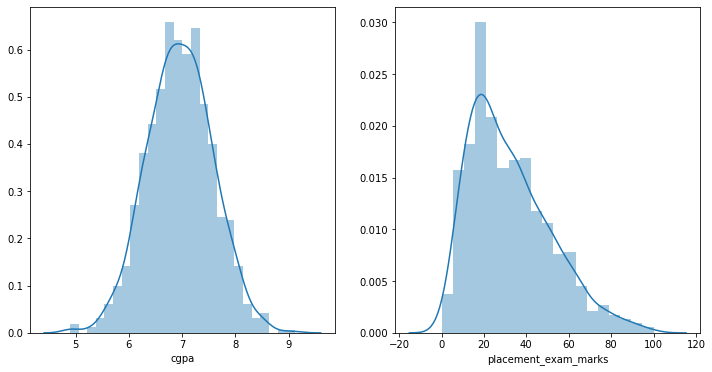

In [59]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [60]:
df['placement_exam_marks'].skew()

0.8356419499466834

In [61]:
print('Heigth allowed=',df['cgpa'].mean()+3*df['cgpa'].std())
print('Lowest allowed=',df['cgpa'].mean()-3*df['cgpa'].std())

Heigth allowed= 8.808933625397177
Lowest allowed= 5.113546374602842


In [62]:
#find the outlier 
df[(df['cgpa']>8.80 )|( df['cgpa']<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [63]:
#Trimming

new_df=df[(df['cgpa']<8.80) & (df['cgpa']>5.11)]

In [64]:
new_df.shape

(995, 3)

In [65]:

# Calculating the Zscore
df['Z_score']=(df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df

,cgpa,placement_exam_marks,placed,Z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
998,8.62,46.0,1,2.693239


In [66]:
df[(df['Z_score']>3)|( df['Z_score']<-3)]

,cgpa,placement_exam_marks,placed,Z_score
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [67]:
#trimming
df_zsco=df[(df['Z_score']<3)&( df['Z_score']>-3)]
df_zsco.shape

(995, 4)

In [69]:
#Capping=data cap in gievn data
upperlimit=df['cgpa'].mean()+3*df['cgpa'].std()
lowerlimit=df['cgpa'].mean()-3*df['cgpa'].std()\

print(upperlimit)
print(lowerlimit)

8.808933625397177
5.113546374602842


In [70]:
df['cgpa']=np.where(df['cgpa']>upperlimit,
                   upperlimit,
                   np.where(df['cgpa']<lowerlimit,
                           lowerlimit,
                           df['cgpa']
                           )
                   )


In [71]:
df.shape

(1000, 4)

### For Skewed distributions:


In [72]:
df.head()

,cgpa,placement_exam_marks,placed,Z_score
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [73]:
df=df.drop('Z_score',axis=1)

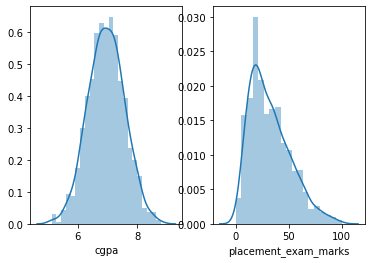

In [74]:

plt.subplot(1,2,1)
sns.distplot(df['cgpa'])
plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [75]:
#we took placement_exam_marks because skewd data
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<AxesSubplot:xlabel='placement_exam_marks'>

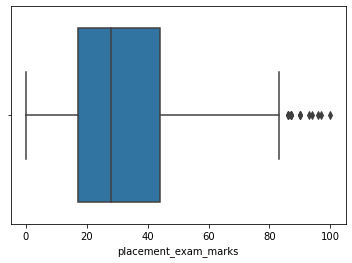

In [76]:
sns.boxplot(df['placement_exam_marks'])

In [77]:
#finding IQR
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)
print(percentile25)
print(percentile75)

17.0
44.0


In [78]:
iqr=percentile75-percentile25
iqr

27.0

In [79]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 84.5
Lower limit -23.5


### Finding Outliers

In [80]:
df[df['placement_exam_marks'] >upper_limit] 

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [81]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [82]:
#Trimming
new_df = df[df['placement_exam_marks'] < upper_limit]
new_df.shape

(985, 3)

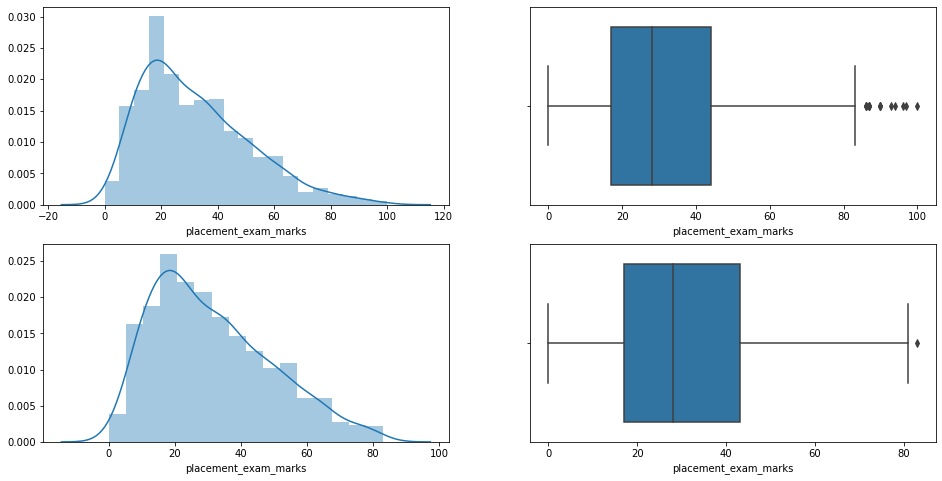

In [83]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()

In [84]:
"""np.where(condtion,true,false)"""
new_df_camp=df.copy()
new_df_camp['placement_exam_marks']=np.where(
new_df_camp['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(new_df_camp['placement_exam_marks']<lower_limit,
             lower_limit,
             new_df_camp['placement_exam_marks']
    )
)

In [85]:
new_df_camp.shape

(1000, 3)

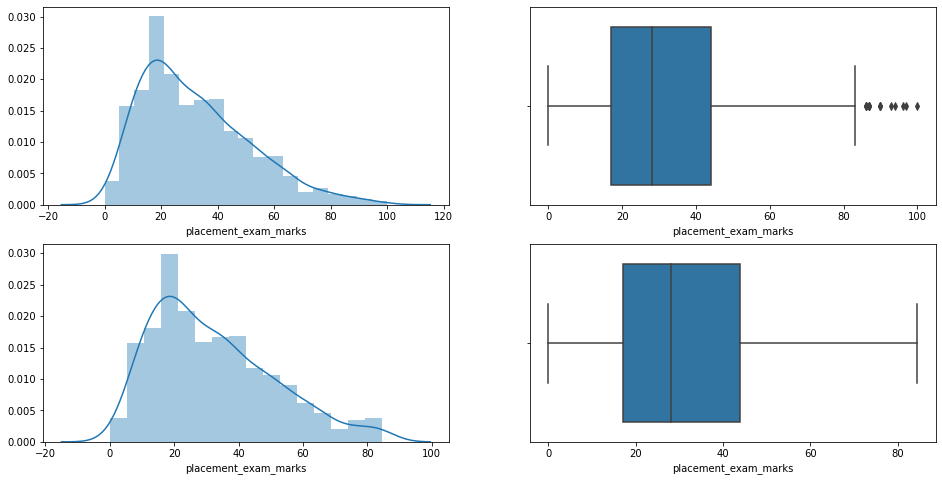

In [86]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_camp['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_camp['placement_exam_marks'])

plt.show()

### Use percentile

In [87]:
df2=pd.read_csv('weight-height.csv')
df2.head(10)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [88]:
df2.shape

(10000, 3)

In [89]:
df2.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<AxesSubplot:xlabel='Height'>

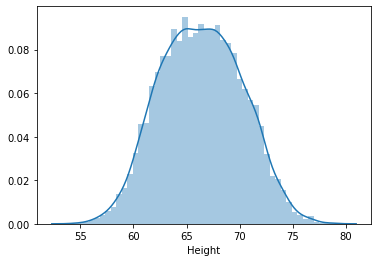

In [90]:
sns.distplot(df2['Height'])

<AxesSubplot:xlabel='Height'>

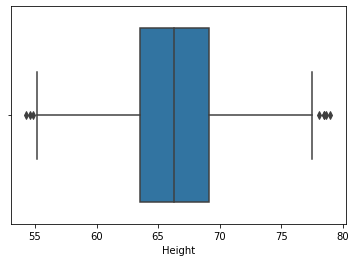

In [91]:
sns.boxplot(df2['Height'])

In [92]:
#set quantile himslf  if upper limit is 99% and we have to look 1 % in lower quantile
upper_limit = df2['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [93]:
lower_limit = df2['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [94]:
new_df = df2[(df2['Height'] <= 74.78) & (df2['Height'] >= 58.13)]

<AxesSubplot:xlabel='Height'>

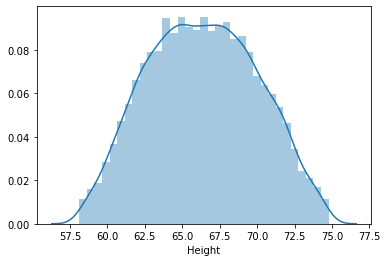

In [95]:
sns.distplot(new_df['Height'])

<AxesSubplot:xlabel='Height'>

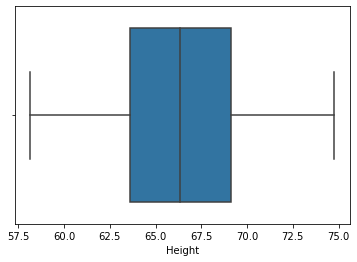

In [96]:
sns.boxplot(new_df['Height'])

In [98]:
 #Capping --> Winsorization
df2['Height'] = np.where(df2['Height'] >= upper_limit,
        upper_limit,
        np.where(df2['Height'] <= lower_limit,
        lower_limit,
        df2['Height']))

In [99]:
df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [100]:
df2['Height'].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height'>

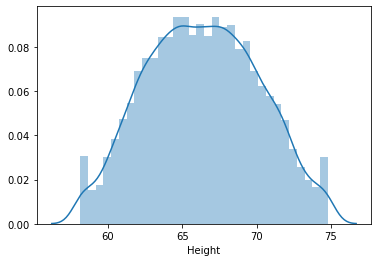

In [101]:
sns.distplot(df2['Height'])

<AxesSubplot:xlabel='Height'>

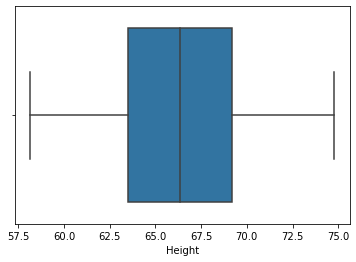

In [102]:
sns.boxplot(df2['Height'])

## 3.Log Transform

Logarithm transformation or log transform is one of the commonly used mathematical techniques in machine learning. Log transform helps in handling the skewed data, and it makes the distribution more approximate to normal after transformation. It also reduces the effects of outliers on the data, as because of the normalization of magnitude differences, a model becomes much robust.

In [103]:
import pandas as pd
import numpy as np

# Create a sample dataframe
data = {'A': [10, 100, 1000, 10000],
        'B': [1, 2, 3, 4]}
df = pd.DataFrame(data)

# Log transformation using numpy's log function
df_log = np.log(df)

# Output the transformed dataframe
print(df_log)


          A         B
0  2.302585  0.000000
1  4.605170  0.693147
2  6.907755  1.098612
3  9.210340  1.386294


In [110]:
import seaborn as sns

<AxesSubplot:xlabel='A'>

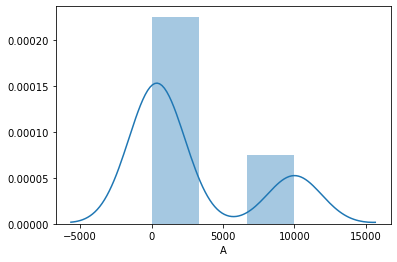

In [112]:
sns.distplot(df['A'])

<AxesSubplot:xlabel='A'>

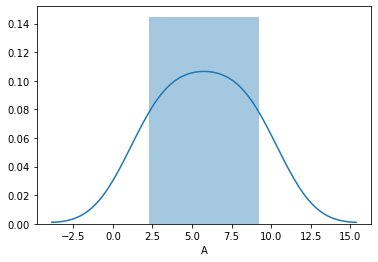

In [108]:
sns.distplot(df_log['A'])

## 4.Binning

 Binning is a data transformation technique that involves dividing a continuous variable into discrete bins or intervals. It is useful when you want to simplify the data or create categorical variables based on numerical ranges. Binning can help handle outliers, reduce noise, and capture non-linear relationships in the data.



In [114]:
import pandas as pd

# Create a sample dataframe
data = {'A': [10, 25, 30, 42, 50, 60, 70, 80, 90, 100]}
df = pd.DataFrame(data)

# Define bin edges and labels
bin_edges = [0, 30, 60, 100]
bin_labels = ['Low', 'Medium', 'High']

# Apply binning to a new column
df['Binned'] = pd.cut(df['A'], bins=bin_edges, labels=bin_labels, right=False)

# Output the transformed dataframe
print(df)


     A  Binned
0   10     Low
1   25     Low
2   30  Medium
3   42  Medium
4   50  Medium
5   60    High
6   70    High
7   80    High
8   90    High
9  100     NaN


## 5.Feature Split

#### Feature split is the process of splitting features intimately into two or more parts and performing to make new features. 
This technique helps the algorithms to better understand and learn the patterns in the dataset.



In [126]:
import pandas as pd

# Creating a sample dataframe
data = {
    'Student Roll No': [1, 2, 3, 4, 5],
    'Name and Surname': ['John Smith', 'Emma Johnson', 'Michael Brown', 'Sophia Lee', 'Daniel Wilson'],
    'Subjects and Marks': ['Math:90, Science:85', 'Math:75, Science:80', 'Math:95, Science:90', 'Math:80, Science:85', 'Math:85, Science:90']
}

df = pd.DataFrame(data)

# Displaying the dataframe
print("Original DataFrame:")
print(df)

# Splitting 'Name and Surname' column into 'Name' and 'Surname' columns
df[['Name', 'Surname']] = df['Name and Surname'].str.split(' ', 1, expand=True)

# Dropping the original 'Name and Surname' column
df = df.drop('Name and Surname', axis=1)

# Separating the features and the target variable
features = df.drop('Subjects and Marks', axis=1)  # Drop the 'Subjects and Marks' column from features
target = df['Subjects and Marks']  # Select the 'Subjects and Marks' column as the target variable

# Printing the updated dataframe and the split features
print("\nUpdated DataFrame:")
print(df)

print("\nSplit Features:")
print(features)

print("\nTarget:")
print(target)


Original DataFrame:
   Student Roll No Name and Surname   Subjects and Marks
0                1       John Smith  Math:90, Science:85
1                2     Emma Johnson  Math:75, Science:80
2                3    Michael Brown  Math:95, Science:90
3                4       Sophia Lee  Math:80, Science:85
4                5    Daniel Wilson  Math:85, Science:90

Updated DataFrame:
   Student Roll No   Subjects and Marks     Name  Surname
0                1  Math:90, Science:85     John    Smith
1                2  Math:75, Science:80     Emma  Johnson
2                3  Math:95, Science:90  Michael    Brown
3                4  Math:80, Science:85   Sophia      Lee
4                5  Math:85, Science:90   Daniel   Wilson

Split Features:
   Student Roll No     Name  Surname
0                1     John    Smith
1                2     Emma  Johnson
2                3  Michael    Brown
3                4   Sophia      Lee
4                5   Daniel   Wilson

Target:
0    Math:90, Science:

In [127]:
import pandas as pd

# Creating a sample dataframe
data = {
    'Student Roll No': [1, 2, 3, 4, 5],
    'Name and Surname': ['John Smith', 'Emma Johnson', 'Michael Brown', 'Sophia Lee', 'Daniel Wilson'],
    'Subjects': ['Math', 'Science', 'English', 'Math', 'Science'],
    'Marks': [90, 85, 92, 88, 93]
}

df = pd.DataFrame(data)

# Displaying the dataframe
print("Original DataFrame:")
print(df)

# Splitting 'Name and Surname' column into 'Name' and 'Surname' columns
df[['Name', 'Surname']] = df['Name and Surname'].str.split(' ', 1, expand=True)

# Dropping the original 'Name and Surname' column
df = df.drop('Name and Surname', axis=1)

# Separating the features and the target variable
features = df.drop('Marks', axis=1)  # Drop the 'Marks' column from features
target = df['Marks']  # Select the 'Marks' column as the target variable


Original DataFrame:
   Student Roll No Name and Surname Subjects  Marks
0                1       John Smith     Math     90
1                2     Emma Johnson  Science     85
2                3    Michael Brown  English     92
3                4       Sophia Lee     Math     88
4                5    Daniel Wilson  Science     93


In [128]:
df

,Student Roll No,Subjects,Marks,Name,Surname
0,1,Math,90,John,Smith
1,2,Science,85,Emma,Johnson
2,3,English,92,Michael,Brown
3,4,Math,88,Sophia,Lee
4,5,Science,93,Daniel,Wilson


In [130]:
features

,Student Roll No,Subjects,Name,Surname
0,1,Math,John,Smith
1,2,Science,Emma,Johnson
2,3,English,Michael,Brown
3,4,Math,Sophia,Lee
4,5,Science,Daniel,Wilson


In [131]:
target

0    90
1    85
2    92
3    88
4    93
Name: Marks, dtype: int64

In [132]:
import pandas as pd

# Create a sample dataframe
data = {
    'TV': [230.1, 44.5, 17.2, 151.5, 180.8],
    'Radio': [37.8, 39.3, 45.9, 41.3, 10.8],
    'Newspaper': [69.2, 45.1, 69.3, 58.5, 58.4],
    'Sales': [22.1, 10.4, 12.0, 16.5, 17.9]
}

df = pd.DataFrame(data)

# Display the original dataframe
print("Original DataFrame:")
print(df)

# Splitting the features and target variable
features = df[['TV', 'Radio', 'Newspaper']]  # Select the 'TV', 'Radio', 'Newspaper' columns as features
target = df['Sales']  # Select the 'Sales' column as the target variable

# Printing the shapes of features and target to verify the split
print("\nFeatures shape:", features.shape)
print("Target shape:", target.shape)


Original DataFrame:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

Features shape: (5, 3)
Target shape: (5,)


## 6.One hot encoding


 One hot encoding is a technique that we use to represent categorical variables as numerical values in a machine learning model.

 It allows the use of categorical variables in models that require numerical input.
It can improve model performance by providing more information to the model about the categorical variable.
It can help to avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering (e.g. “small”, “medium”, “large”).


In [133]:
import pandas as pd

# Create a sample dataframe with categorical feature
data = {
    'Category': ['A', 'B', 'A', 'C', 'B']
}

df = pd.DataFrame(data)

# Perform one-hot encoding
encoded_df = pd.get_dummies(df['Category'])

# Concatenate the encoded dataframe with the original dataframe
df_encoded = pd.concat([df, encoded_df], axis=1)

# Display the original and encoded dataframes
print("Original DataFrame:")
print(df)

print("\nEncoded DataFrame:")
print(df_encoded)


Original DataFrame:
  Category
0        A
1        B
2        A
3        C
4        B

Encoded DataFrame:
  Category  A  B  C
0        A  1  0  0
1        B  0  1  0
2        A  1  0  0
3        C  0  0  1
4        B  0  1  0


### Advantage:

1.It allows the use of categorical variables in models that require numerical input.

2.It can improve model performance by providing more information to the model about the categorical variable.

3.It can help to avoid the problem of ordinality, which can occur when a categorical variable has a natural ordering (e.g. “small”, “medium”, “large”).


### The disadvantages of using one hot encoding include:

1.It can lead to increased dimensionality, as a separate column is created for each category in the variable. This can make the model more complex and slow to train.
 
2.It can lead to sparse data, as most observations will have a value of 0 in most of the one-hot encoded columns.
 
3.It can lead to overfitting, especially if there are many categories in the variable and the sample size is relatively small.
 
4.One-hot-encoding is a powerful technique to treat categorical data, but it can lead to increased dimensionality, sparsity, and overfitting. It is important to use it cautiously and consider other methods such as ordinal encoding or binary encoding.